# EDA of the automobile dataset

In [332]:
# Importing the required packages here
import numpy as np
import pandas as pd
import ast, json
from datetime import datetime

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("automobile.txt")

#Preview the first few rows of the dataset
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Understanding our data

In [333]:
#understand the nature of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [334]:
#find null fields
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

above we can see there are no null values (nan/blanks) in the the dataset, however we can see that there are "?'s" in some rows which is esentially in this case represents a blank; so we will have to address that

In [335]:
# replace '?' with NaN
df.replace('?', pd.np.nan, inplace=True)

# find all the missing values
df.isnull().sum()

C:\Users\grobb\AppData\Local\Temp\ipykernel_18692\1823913664.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.replace('?', pd.np.nan, inplace=True)


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Data Cleansing 


After looking at the the txt file, all of the colums apear (on own visual inspection) to contain useful and distinguishable data. However, considering the number of missing values (close to 1/4 of the total) in 'normalized-losses' we will drop it. All of the other colums appears to contain possibly useful information, so for now I will keep it; even if we do not end up using all of it  

In [336]:
#drop column we are not using
df.drop('normalized-losses',axis=1, inplace=True)

#### Address the remaining blanks

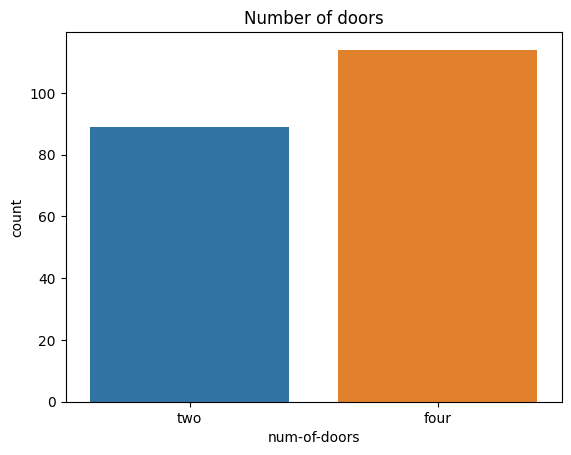

In [337]:
#see the distribution of the num-of-doors column that have nan's
sns.countplot(x=df['num-of-doors'])
plt.title('Number of doors')
plt.show()

The number of doors is classified as an object and have 2 options; 2 or 4. From the graph we can see that 4 is the mode and for that reason I will replace the 2 nan columns with the mode value

In [338]:
# find the mode of the column
mode = df['num-of-doors'].mode().iloc[0]

# fill missing values with the mode
df['num-of-doors'].fillna(mode, inplace=True)

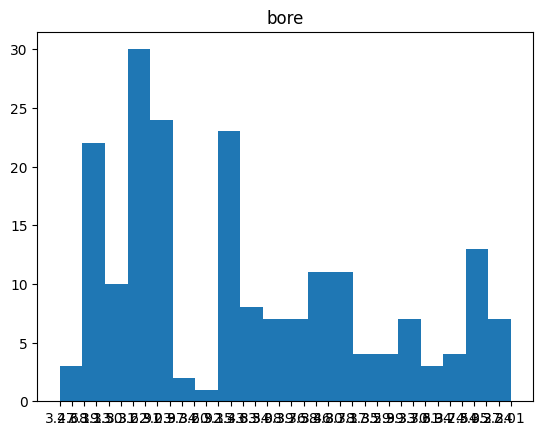

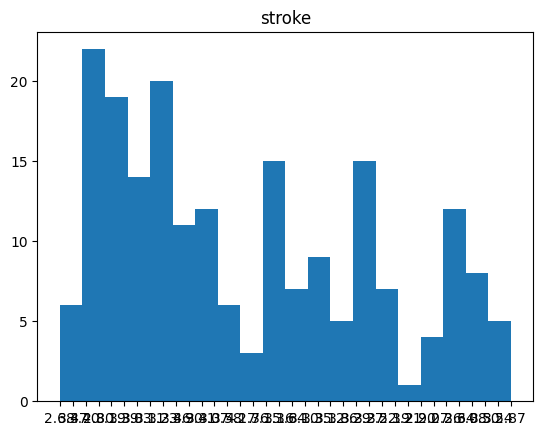

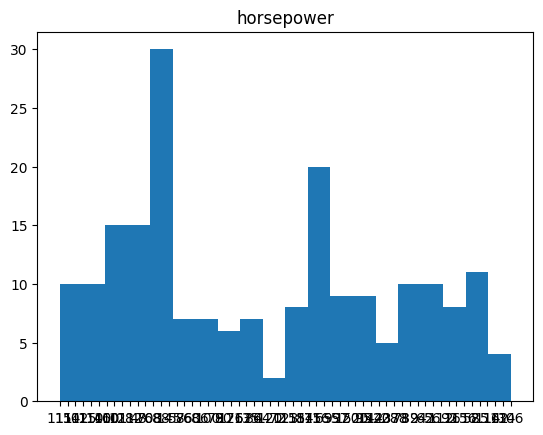

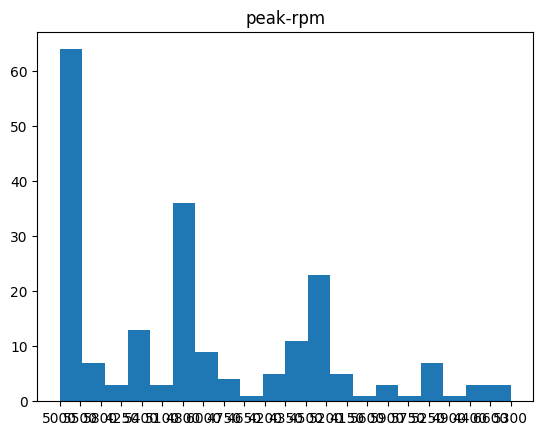

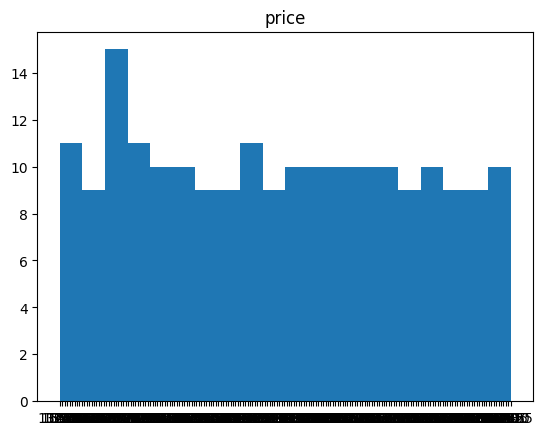

In [339]:
remaining_blanks = df[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']]

for col in remaining_blanks.columns:
    plt.hist(remaining_blanks[col].dropna(), bins=20)
    plt.title(col)
    plt.show()

Looking at the the graphs, all appears to be nonsymetric; so using the medians makes sense. Considering the small number of missing values; i will use the medians and also consider the car make in this

In [340]:
# Group by make and calculate the median values for each group
grouped = df.groupby('make')[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].median()
print(grouped)

               bore  stroke  horsepower  peak-rpm    price
make                                                      
alfa-romero    3.47   2.680       111.0    5000.0  16500.0
audi           3.19   3.400       110.0    5500.0  17580.0
bmw            3.50   3.190       121.0    5400.0  22835.0
chevrolet      3.03   3.110        70.0    5400.0   6295.0
dodge          2.97   3.230        68.0    5500.0   7609.0
honda          2.92   3.410        76.0    5800.0   7295.0
isuzu          3.17   3.170        74.0    5200.0   8916.5
jaguar         3.63   4.170       176.0    4750.0  35550.0
mazda          3.39   3.390        84.0    5000.0  10595.0
mercedes-benz  3.58   3.495       139.0    4425.0  32892.0
mercury        3.78   3.120       175.0    5000.0  16503.0
mitsubishi     3.17   3.460       102.0    5500.0   8499.0
nissan         3.15   3.290        69.0    5200.0   8124.0
peugot         3.61   3.210        95.0    5000.0  16630.0
plymouth       2.97   3.230        68.0    5500.0   7609

c:\Users\grobb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\grobb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [341]:
# Iterate over the group names and fill missing values with corresponding medians
for make in grouped.index:
    condition = (df['make'] == make) & (df[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].isnull().any(axis=1))
    df.loc[condition, ['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']] = df.loc[condition, ['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].fillna(grouped.loc[make])

#check to see if there are still NaN's left
print(df[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].isnull().sum())


bore          0
stroke        0
horsepower    2
peak-rpm      2
price         0
dtype: int64


looking at the data again, the Renualt make do not have any horsepower or peak-rpm data hence there is still NaNs. Therefore we will use the median of all makes to impute the horsepower and peak-rpm for the values that are still missing

In [342]:
# replace null values in horsepower column with median value
horsepower_median = df['horsepower'].median()
df['horsepower'].fillna(horsepower_median, inplace=True)

# replace null values in peak-rpm column with median value
peakrpm_median = df['peak-rpm'].median()
df['peak-rpm'].fillna(peakrpm_median, inplace=True)

#check to see if there are still NaN's left
print(df[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].isnull().sum())

bore          0
stroke        0
horsepower    0
peak-rpm      0
price         0
dtype: int64


In [343]:
#now convert all object data types that were wrongfully classified (due to the nans/?)

#convert bore and stroke from object to float
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)

#convert peak-rpm , highway-mpg, price  to int64, since the values in the file is integers... 
df['horsepower'] = df['horsepower'].astype(np.int64)
df['peak-rpm'] = df['peak-rpm'].astype(np.int64)
df['price'] = df['price'].astype(np.int64)

### Exploration
## Identify relationships between variables / features

#### Correlation Heatmap to start to look at how numerical variables in the dataset are correlated to one another

C:\Users\grobb\AppData\Local\Temp\ipykernel_18692\4151372349.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


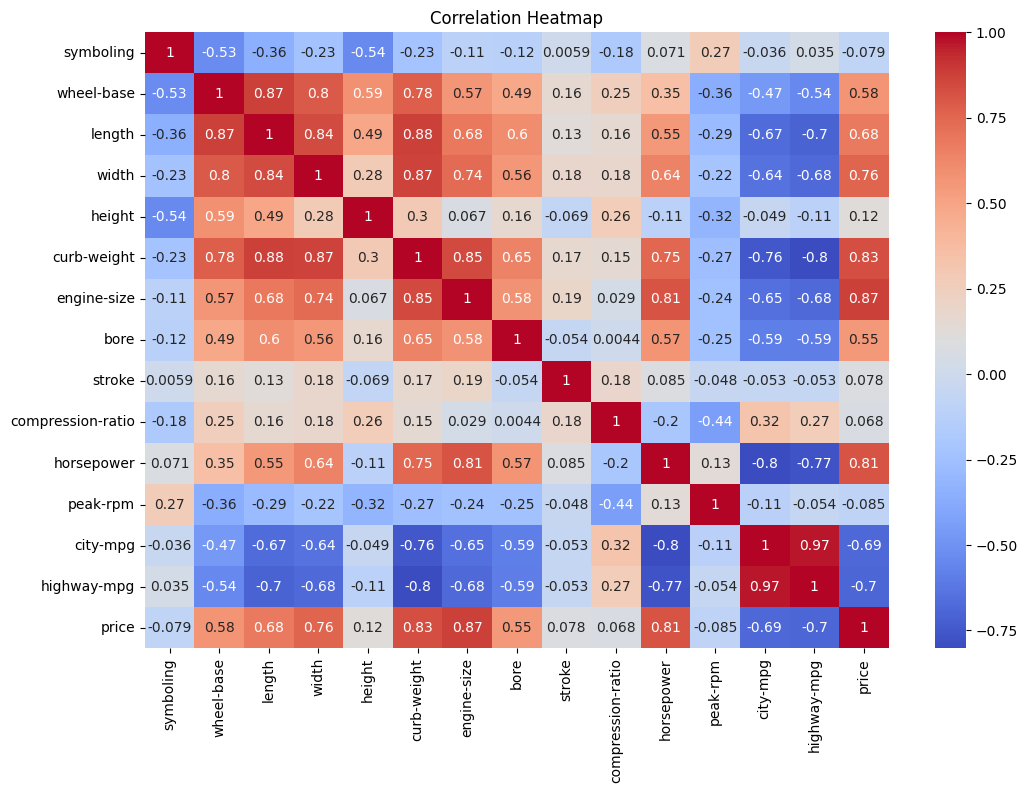

In [344]:
#set a large enough size since we have a sizable number of numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

###### The heatmap gives a brief overview of the correlations between variables as it measures how strongly two variables are related, and it ranges from -1 to 1. A positive correlation means that as one variable increases, the other variable also tends to increase. A negative correlation means that as one variable increases, the other variable tends to decrease. A correlation of zero means there is little to no correlation. 

###### From this particular heatmap we can see the strongest positive correlations (decending order) that we have is; 
###### 1. City-mpg and Highway-mpg (correlation = 0.97)
###### 2. Curb-weight and Lenght (correlation = 0.88)
###### 3. Price and Engine-size & Wheel-base and Lenght (correlations both = 0.87)

###### From this particular heatmap we can see the strongest negative correlations (decending order) that we have is; 
###### 1. Curb-weight and Highway-mpg & Horsepower and City-mpg (correlaions both = -0.8)
###### 2. Horsepower and Highway-mpg (correlation = -0.77)
###### 3. Curb-weight and City-mpg  (correlation = -0.76)

###### From this we can extrapolate which numerical variables could be relevant to explore further. A heatmap is very useful for large datasets. The automobile dataset only contains 205 vechicles, but we still gain a general understanding from the heatmap

#### A barplot of the frequency of each make in the dataset

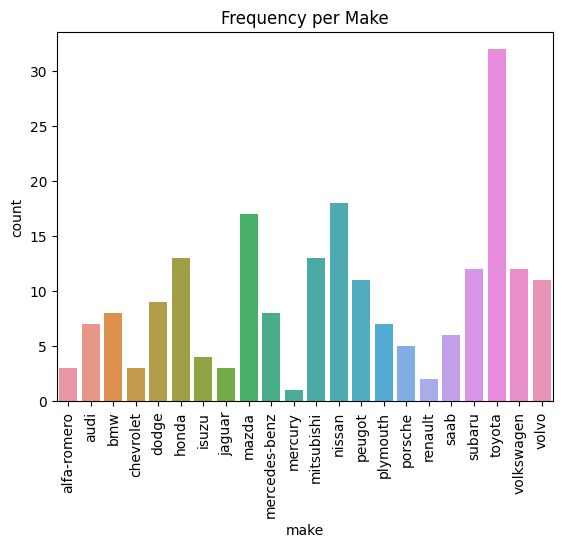

In [345]:
#Plot frequency by make
plt.figure()
sns.countplot(x='make', data=df)
plt.xticks(rotation=90) 
plt.title('Frequency per Make')
plt.show()

###### The Frequency by Make graph shows us how many cars there are in the dataset per make. The make Toyota has the most cars (33 cars) in our dataset and the make with the least amount of cars in the dataset is Mercury (1 car)

#### A barplot of the mean price of each car make

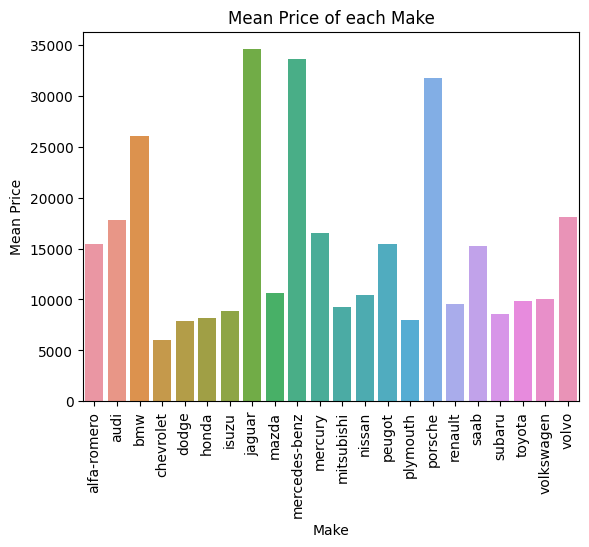

In [346]:
#filter data by car make and price
mean_price = df.groupby('make')['price'].mean()

#Plot mean price by make
plt.figure()
sns.barplot(x=mean_price.index, y=mean_price.values)
plt.title('Mean Price of each Make')
plt.xlabel('Make')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.show()



###### The Mean Price of each Make graph shows the average price of a car based on its make. In the graph we see that Jaguar has the highest average price and Chevorlet the lowest
###### This graph simply looks at the average price for each make; we could look at all the variables in relation to the make and it could reveal interesting data stories. However it is important to remember that we only have 3 Jaguars in the dataset and 3 Chevorlets, but for a make like Toyota we have 33 cars. So consindering the the small size of the dataset and the limited number of vechicles for some of the makes our conclusions would be highily skewed when comparing makes with a lot of data in the dataset to makes with very few data in the dataset. 

#### A pie chart for the respective fuel systems

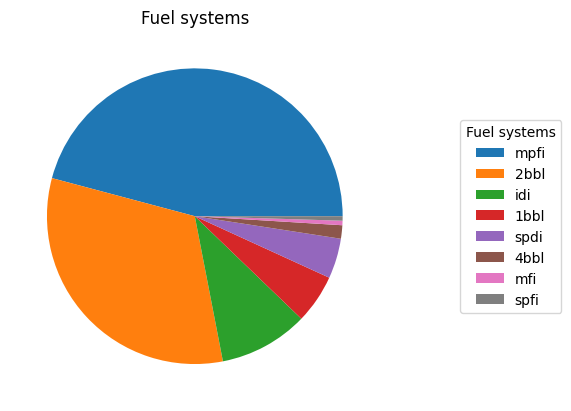

In [347]:
#filter data to get fuel systems
fuel_systems = df['fuel-system'].value_counts()

# plot pie chart with no labels
plt.pie(fuel_systems.values, labels=None)

# add legend outside the pie chart
plt.legend(fuel_systems.index, title='Fuel systems', loc='center left', bbox_to_anchor=(1.2, 0.5))

# set title
plt.title('Fuel systems')

plt.show()

###### The pie chart above shows the different fuels systems of the cars in our dataset. From the graph we can se that the most common fuel system is mpfi followed by 2bbl. mfi and spfi are the least used fuel systems

#### A box plot showing the horsepower of the fuel systems

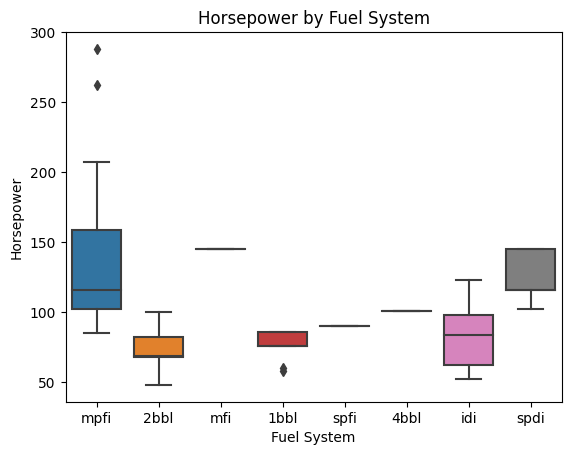

In [348]:
# Create a box plot with x-axis used for each fuel system and the horspower on the y-axis
sns.boxplot(x='fuel-system', y='horsepower', data=df)
plt.xlabel('Fuel System')
plt.ylabel('Horsepower')
plt.title('Horsepower by Fuel System')
plt.show()

In [349]:
# Count the number of instances for each fuel system
fuel_system_counts = df['fuel-system'].value_counts() 

# Group the data by fuel system and calculate the mean horsepower for each group
avg_horsepower = df.groupby('fuel-system')['horsepower'].mean()

# Print the results
print(fuel_system_counts)
print(avg_horsepower)

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64
fuel-system
1bbl     76.545455
2bbl     73.090909
4bbl    101.000000
idi      84.450000
mfi     145.000000
mpfi    131.159574
spdi    125.777778
spfi     90.000000
Name: horsepower, dtype: float64


###### The box plot above and averages gives more context to the pie chart and invesitgates the association between the fuel system used and the horsepower of the vehicle. We can see that the most common fuel system; mpfi is also associated with higher horsepowers. 

#### Bar plot that shows the relationship between fuel system and fuel type

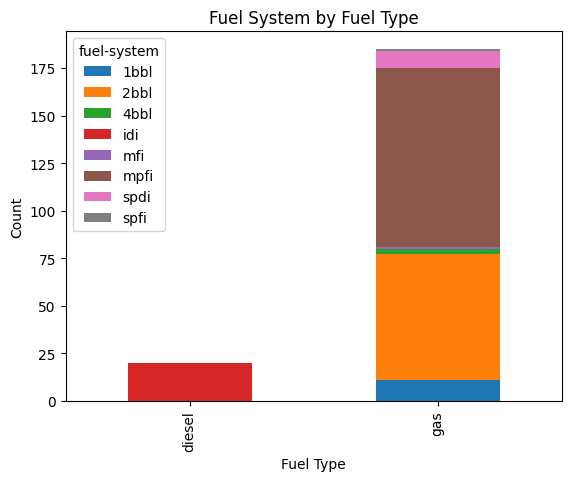

In [350]:
# Count the number of occurrences of each fuel system for each fuel type
fuel_counts = pd.crosstab(df['fuel-type'], df['fuel-system'])

# Create a stacked bar plot
fuel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Fuel System by Fuel Type')
plt.show()

###### This bar plot shows us that not only is most of the vechicles in the df gas; but also the distribution of the fuel systems based on the fuel type. We can see that idi is strictly fueled by diesel

We could explore a lot more in the dataset; considering price or any of the other factors seen in the heatmaps to have high correlations. The same with the catagorial variables. But here we clean the data and did some EDA